<a href="https://colab.research.google.com/github/evtaylor00/Concussion/blob/main/ConcussionDataReplication_CHAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [1]:
!pip install pycaret
!pip install pycaret[full]
!pip install catboost
#!pip install pandas
#!pip install scikit-learn
#!pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C
^C


#Subsetting Data

In [3]:
import pandas as pd
import pycaret as py
import sklearn as sk
import numpy as np
import pycaret.regression as pycr
from pycaret.classification import ClassificationExperiment
clf1 = ClassificationExperiment()

conc_data=pd.read_csv("/Concussion_DB_ML_Manuscript-EDITED.csv", header=1) #read in data
conc_data=conc_data.dropna(subset=['days']) #drop rows with NA for 'days'
conc_data['sportcat']=conc_data['sportcat'].astype("category")


males=conc_data.loc[conc_data['sex'] == 0] #subset males
males['protracted'] = np.where((males["days"] > 21), 1, 0) #create protracted variable
females=conc_data.loc[conc_data['sex'] == 1] #subset females
females['protracted'] = np.where((females["days"] > 21), 1, 0) #create protracted variable

m_train, m_test = sk.model_selection.train_test_split(males, test_size=0.2, random_state=1) #subset males into train and test
f_train, f_test = sk.model_selection.train_test_split(females, test_size=0.2, random_state=1) #subset females into train and test


In [ ]:
print(conc_data)
print(males)
print(m_train)
print(m_test)

     partid  dataset  sex  age  grade  dsi        sport sportcat  pcss hxconc  \
0      1000        2    0   10    NaN  NaN     football      3.0  58.0    yes   
1      1001        1    0   14    8.0  1.0     Football      3.0   NaN      0   
2      1002        1    0   13    7.0  1.0     Football      3.0   NaN      1   
3      1003        1    1   15    9.0  3.0       Soccer      2.0   NaN      0   
4      1004        1    1   17   12.0  6.0     Swimming      1.0   NaN      1   
..      ...      ...  ...  ...    ...  ...          ...      ...   ...    ...   
650    1651        3    0   16    NaN  NaN   basketball      2.0  33.0      0   
651    1652        3    0   13    NaN  NaN   basketball      2.0  24.0      0   
652    1653        3    1   15    NaN  NaN  color guard      1.0   NaN      0   
653    1654        2    0   12    NaN  NaN     football      3.0  87.0      1   
654    1655        2    1   13    NaN  NaN          NaN      NaN   NaN      0   

     ...  pur1  sach1 sacv1

#Setup pycaret Regression and Experiment

In [4]:
#predict days to recovery - male
m_regression = pycr.setup(m_train,  target = 'days', ignore_features=['protracted','protractrecov14', 'protractrecov30', 'protractrecov60', 'protractrecov90', 'partid', 'dataset','sport', 'hxmigfreq', 'hxdizztype', 'hxheadachetype', 'hxvisiontype', 'hxamnesiatype', 'locdur'],index=False, train_size=0.8125, session_id=6343) #setup model for predicting days to recovery
m_best_reg = m_regression.compare_models() #compare ML models

#predict protracted recovery - male
m_experiment = clf1.setup(m_train, target = 'protracted', ignore_features=['days','protractrecov14', 'protractrecov30', 'protractrecov60', 'protractrecov90', 'partid', 'dataset', 'sport', 'hxmigfreq', 'hxdizztype', 'hxheadachetype', 'hxvisiontype', 'hxamnesiatype', 'locdur'],index=False, train_size=0.8125, session_id=8465)
m_best_exp=m_experiment.compare_models() #compare ML models

#predict days to recovery - female
f_regression = pycr.setup(f_train,  target = 'days', ignore_features=['protracted','protractrecov14', 'protractrecov30', 'protractrecov60', 'protractrecov90', 'partid', 'dataset', 'sport', 'hxmigfreq', 'hxdizztype', 'hxheadachetype', 'hxvisiontype', 'hxamnesiatype', 'locdur'],index=False, train_size=0.8125, session_id=8174) #setup model for predicting days to recovery
f_best_reg = f_regression.compare_models() #compare ML models

#predict protracted recovery - female
f_experiment = clf1.setup(f_train, target = 'protracted', ignore_features=['days','protractrecov14', 'protractrecov30', 'protractrecov60', 'protractrecov90', 'partid', 'dataset','sport', 'hxmigfreq', 'hxdizztype', 'hxheadachetype', 'hxvisiontype', 'hxamnesiatype', 'locdur'],index=False, train_size=0.8125, session_id=5571)
f_best_exp=m_experiment.compare_models()


,Description,Value
0,Session id,6343
1,Target,days
2,Target type,Regression
3,Original data shape,"(287, 114)"
4,Transformed data shape,"(287, 106)"
5,Transformed train set shape,"(233, 106)"
6,Transformed test set shape,"(54, 106)"
7,Ignore features,14
8,Numeric features,95
9,Categorical features,4


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,11.1163,341.8610,16.3479,-0.0300,0.5406,0.5070,0.1060
dummy,Dummy Regressor,11.5461,333.2986,16.4002,-0.0435,0.5625,0.6137,0.1080
lightgbm,Light Gradient Boosting Machine,12.4620,376.7197,17.5976,-0.2375,0.6026,0.6658,0.7360
et,Extra Trees Regressor,12.1559,387.5591,17.7902,-0.3360,0.5877,0.6550,0.4190
rf,Random Forest Regressor,12.2818,406.7014,18.1160,-0.4535,0.5886,0.6548,0.6170
en,Elastic Net,11.9067,415.1075,18.1330,-0.5084,0.5645,0.6133,0.1560
huber,Huber Regressor,12.6854,414.5428,18.7015,-0.5177,0.6308,0.6276,0.1360
lasso,Lasso Regression,12.2969,439.2111,18.7339,-0.6387,0.5816,0.6389,0.1110
llar,Lasso Least Angle Regression,12.2965,439.2459,18.7341,-0.6389,0.5816,0.6389,0.1120
br,Bayesian Ridge,12.1037,472.1601,18.9481,-0.8638,0.5710,0.6214,0.1110


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

#Models to Predict Protracted Recovery

##Females

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6579,0.0000,0.9565,0.6471,0.7719,0.1794,0.2493
1,0.5946,0.0000,0.8696,0.6250,0.7273,0.0142,0.0176
2,0.4054,0.0000,0.4348,0.5263,0.4762,-0.1971,-0.2019
3,0.6486,0.0000,0.9130,0.6562,0.7636,0.1456,0.1806
4,0.5135,0.0000,0.8636,0.5588,0.6786,-0.1562,-0.2453
Mean,0.5640,0.0000,0.8075,0.6027,0.6835,-0.0028,0.0001
Std,0.0945,0.0000,0.1894,0.0512,0.1088,0.1528,0.1980


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6579,0.0000,0.9565,0.6471,0.7719,0.1794,0.2493
1,0.6216,0.0000,0.9130,0.6364,0.7500,0.0650,0.0873
2,0.4324,0.0000,0.5652,0.5417,0.5532,-0.2236,-0.2240
3,0.6216,0.0000,0.8696,0.6452,0.7407,0.0944,0.1103
4,0.5405,0.0000,0.8636,0.5758,0.6909,-0.0789,-0.1102
Mean,0.5748,0.0000,0.8336,0.6092,0.7014,0.0073,0.0225
Std,0.0809,0.0000,0.1383,0.0428,0.0787,0.1423,0.1684


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


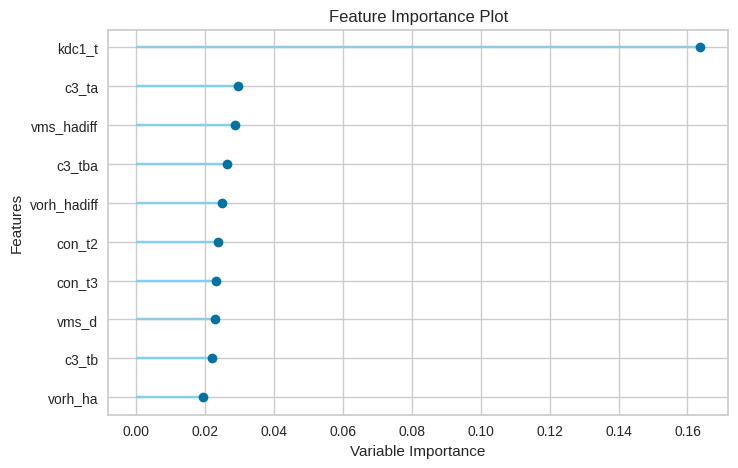

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7273,0.8301,0.9259,0.7143,0.8065,0.3699,0.4076


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7414,0.7274,0.8780,0.7826,0.8276,0.3171,0.3257


,partid,dataset,sex,age,grade,dsi,sport,sportcat,pcss,hxconc,...,con1,vorh1,vorv1,vms1,voms1,voms2,voms3,protracted,prediction_label,prediction_score
0,1604,3,1,9,NaN,NaN,cheer,2.0,NaN,0,...,1,1,1,1,1,0,0,0,1,0.6140
1,1577,3,1,13,NaN,NaN,football,3.0,14.0,0,...,0,0,1,0,1,0,0,1,0,0.7556
2,1394,2,1,14,NaN,NaN,no,NaN,NaN,0,...,1,1,1,1,1,1,1,1,1,0.6710
3,1211,1,1,14,9.0,4.0,Basketball,2.0,NaN,0,...,1,1,1,1,1,1,1,1,1,0.6462
4,1655,2,1,13,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.7425
5,1032,1,1,11,6.0,4.0,Basketball,2.0,NaN,0,...,1,1,1,1,1,0,0,1,1,0.7168
6,1031,1,1,17,11.0,1.0,Softball,2.0,NaN,0,...,1,1,1,1,1,1,0,1,1,0.7775
7,1188,1,1,14,10.0,5.0,Cheer,2.0,NaN,0,...,1,1,1,0,1,1,0,0,1,0.5155
8,1309,2,1,17,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,1,1,0.6003
9,1045,1,1,14,8.0,1.0,Cheer,2.0,NaN,1,...,1,1,1,1,1,0,0,1,1,0.7902


In [ ]:
#Random Forest
f_rf_exp=clf1.create_model('rf', fold=5)
f_rf_grid={'max_depth': [8]}
f_tuned_rf_exp = clf1.tune_model(f_rf_exp, custom_grid=f_rf_grid, fold=5)
clf1.plot_model(f_tuned_rf_exp, plot='feature')
clf1.predict_model(f_tuned_rf_exp)
final_f_rf_exp = clf1.finalize_model(f_tuned_rf_exp)
f_predictions_rf_exp = clf1.predict_model(final_f_rf_exp, data=f_test)
f_predictions_rf_exp


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.7391,0.6800,0.7083,0.2107,0.2120
1,0.4865,0.0000,0.3043,0.7000,0.4242,0.0762,0.0984
2,0.5135,0.0000,0.4348,0.6667,0.5263,0.0698,0.0767
3,0.5135,0.0000,0.4783,0.6471,0.5500,0.0458,0.0484
4,0.3784,0.0000,0.3636,0.4706,0.4103,-0.2245,-0.2329
Mean,0.5047,0.0000,0.4640,0.6329,0.5238,0.0356,0.0405
Std,0.0807,0.0000,0.1499,0.0830,0.1073,0.1423,0.1476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.0000,0.6957,0.6667,0.6809,0.1642,0.1645
1,0.4865,0.0000,0.3913,0.6429,0.4865,0.0303,0.0342
2,0.5405,0.0000,0.3913,0.7500,0.5143,0.1534,0.1834
3,0.5405,0.0000,0.4783,0.6875,0.5641,0.1103,0.1186
4,0.3243,0.0000,0.2727,0.4000,0.3243,-0.3047,-0.3273
Mean,0.4994,0.0000,0.4458,0.6294,0.5140,0.0307,0.0347
Std,0.0953,0.0000,0.1410,0.1201,0.1158,0.1742,0.1882


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


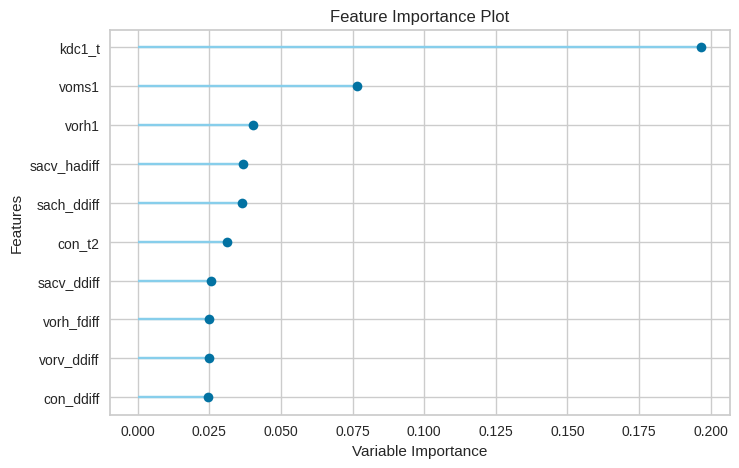

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9217,0.9454,0.9078,0.9624,0.9343,0.8377,0.8399


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5690,0.7805,0.4390,0.9000,0.5902,0.2360,0.3078


In [ ]:
#XGBoost
f_xg_exp=clf1.create_model('xgboost', fold=5)
f_xg_grid = {'max_depth' : [8]}
f_tuned_xg_exp = clf1.tune_model(f_xg_exp,custom_grid=f_xg_grid, fold=5)
clf1.plot_model(f_tuned_xg_exp, plot='feature')
clf1.predict_model(f_tuned_xg_exp,data=f_train)
final_f_xg_exp = clf1.finalize_model(f_tuned_xg_exp)
f_predictions_xg_exp = clf1.predict_model(final_f_xg_exp, data=f_test)

In [ ]:
f_predictions_xg_exp

,partid,dataset,sex,age,grade,dsi,sport,sportcat,pcss,hxconc,...,con1,vorh1,vorv1,vms1,voms1,voms2,voms3,protracted,prediction_label,prediction_score
0,1604,3,1,9,NaN,NaN,cheer,2.0,NaN,0,...,1,1,1,1,1,0,0,0,1,0.5946
1,1577,3,1,13,NaN,NaN,football,3.0,14.0,0,...,0,0,1,0,1,0,0,1,0,0.9866
2,1394,2,1,14,NaN,NaN,no,NaN,NaN,0,...,1,1,1,1,1,1,1,1,1,0.9256
3,1211,1,1,14,9.0,4.0,Basketball,2.0,NaN,0,...,1,1,1,1,1,1,1,1,0,0.9729
4,1655,2,1,13,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0.9538
5,1032,1,1,11,6.0,4.0,Basketball,2.0,NaN,0,...,1,1,1,1,1,0,0,1,0,0.9596
6,1031,1,1,17,11.0,1.0,Softball,2.0,NaN,0,...,1,1,1,1,1,1,0,1,0,0.8533
7,1188,1,1,14,10.0,5.0,Cheer,2.0,NaN,0,...,1,1,1,0,1,1,0,0,0,0.9961
8,1309,2,1,17,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,1,0,0.9668
9,1045,1,1,14,8.0,1.0,Cheer,2.0,NaN,1,...,1,1,1,1,1,0,0,1,0,0.8930


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.8696,0.6452,0.7407,0.1502,0.1718
1,0.5946,0.0000,0.8696,0.6250,0.7273,0.0142,0.0176
2,0.5135,0.0000,0.6522,0.6000,0.6250,-0.0639,-0.0643
3,0.6216,0.0000,0.8696,0.6452,0.7407,0.0944,0.1103
4,0.5676,0.0000,0.8182,0.6000,0.6923,0.0199,0.0228
Mean,0.5858,0.0000,0.8158,0.6231,0.7052,0.0429,0.0516
Std,0.0425,0.0000,0.0842,0.0202,0.0438,0.0734,0.0816


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6579,0.0000,0.9565,0.6471,0.7719,0.1794,0.2493
1,0.6757,0.0000,0.9130,0.6774,0.7778,0.2238,0.2615
2,0.4595,0.0000,0.6087,0.5600,0.5833,-0.1821,-0.1834
3,0.6216,0.0000,0.8696,0.6452,0.7407,0.0944,0.1103
4,0.5135,0.0000,0.7727,0.5667,0.6538,-0.1026,-0.1178
Mean,0.5856,0.0000,0.8241,0.6193,0.7055,0.0426,0.0640
Std,0.0846,0.0000,0.1237,0.0471,0.0755,0.1586,0.1842


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


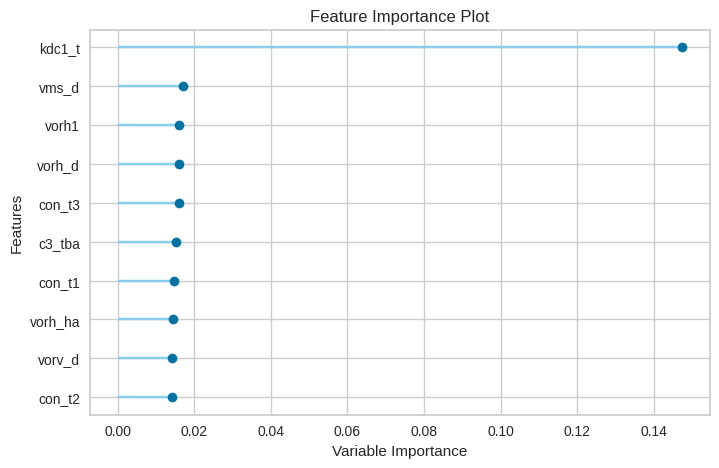

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7727,0.7669,0.8889,0.7742,0.8276,0.4989,0.5092


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6897,0.6026,0.7805,0.7805,0.7805,0.2511,0.2511


In [ ]:
#Extra Tree
f_et_exp=clf1.create_model('et',fold=5)
f_et_grid={'max_depth': [8]}
f_tuned_et_exp = clf1.tune_model(f_et_exp, custom_grid=f_et_grid, fold=5)
clf1.plot_model(f_tuned_et_exp, plot='feature')
clf1.predict_model(f_tuned_et_exp)
final_f_et_exp = clf1.finalize_model(f_tuned_et_exp)
f_predictions_rf_exp = clf1.predict_model(final_f_et_exp, data=f_test)

In [ ]:
print(final_f_et_exp)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sex', 'age', 'grade', 'dsi',
                                             'pcss', 'hxconcquant', 'hxmig',
                                             'psyc', 'hxdizz', 'hxheadache',
                                             'hxvision', 'hxamnesia', 'loc',
                                             'bl_ha', 'bl_d', 'bl_n', 'bl_f',
                                             'pur_ha', 'pur_d', 'pur_n',
                                             'pur_f', 'sach_ha', 'sach_d',
                                             'sach_n', 'sach_f', 'sacv_ha',
                                             'sacv_d', 'sacv_n', 'sa...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.0000,0.7826,0.6429,0.7059,0.1231,0.1287
1,0.5946,0.0000,0.6522,0.6818,0.6667,0.1501,0.1503
2,0.4324,0.0000,0.4783,0.5500,0.5116,-0.1580,-0.1602
3,0.6486,0.0000,0.7391,0.7083,0.7234,0.2425,0.2429
4,0.4324,0.0000,0.5455,0.5217,0.5333,-0.1899,-0.1902
Mean,0.5427,0.0000,0.6395,0.6209,0.6282,0.0336,0.0343
Std,0.0918,0.0000,0.1144,0.0731,0.0885,0.1743,0.1756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.7391,0.6800,0.7083,0.2107,0.2120
1,0.5676,0.0000,0.6087,0.6667,0.6364,0.1057,0.1064
2,0.4865,0.0000,0.5217,0.6000,0.5581,-0.0477,-0.0484
3,0.6216,0.0000,0.7391,0.6800,0.7083,0.1725,0.1737
4,0.4595,0.0000,0.5000,0.5500,0.5238,-0.0979,-0.0985
Mean,0.5533,0.0000,0.6217,0.6353,0.6270,0.0687,0.0691
Std,0.0697,0.0000,0.1025,0.0520,0.0758,0.1213,0.1222


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


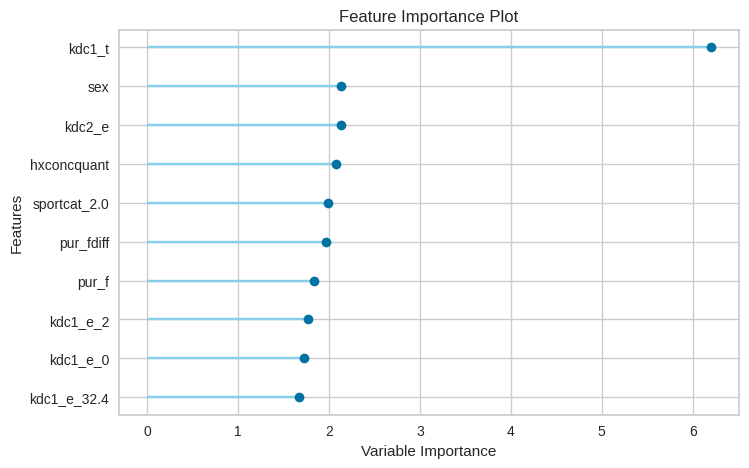

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6364,0.5991,0.5926,0.7619,0.6667,0.2802,0.2910


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5862,0.6801,0.6098,0.7576,0.6757,0.1223,0.1279


In [ ]:
#Logistic Reg Classifier
f_lr_exp=clf1.create_model('lr',fold=5)
f_tuned_lr_exp = clf1.tune_model(f_lr_exp, fold=5)
clf1.plot_model(f_tuned_lr_exp, plot='feature')
clf1.predict_model(f_tuned_lr_exp)
final_f_lr_exp = clf1.finalize_model(f_tuned_lr_exp)
f_predictions_lr_exp = clf1.predict_model(final_f_lr_exp, data=f_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.0000,0.9565,0.6667,0.7857,0.2525,0.3227
1,0.6757,0.0000,0.9565,0.6667,0.7857,0.1986,0.2668
2,0.5135,0.0000,0.6522,0.6000,0.6250,-0.0639,-0.0643
3,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
4,0.5676,0.0000,0.9545,0.5833,0.7241,-0.0534,-0.1376
Mean,0.6125,0.0000,0.9040,0.6277,0.7374,0.0667,0.0775
Std,0.0649,0.0000,0.1270,0.0341,0.0606,0.1325,0.1835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.9130,0.6364,0.7500,0.1279,0.1635
1,0.6216,0.0000,0.9565,0.6286,0.7586,0.0336,0.0599
2,0.5135,0.0000,0.6957,0.5926,0.6400,-0.0954,-0.0984
3,0.6486,0.0000,1.0000,0.6389,0.7797,0.0873,0.2136
4,0.5676,0.0000,0.9545,0.5833,0.7241,-0.0534,-0.1376
Mean,0.5966,0.0000,0.9040,0.6159,0.7305,0.0200,0.0402
Std,0.0496,0.0000,0.1077,0.0233,0.0486,0.0837,0.1389


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


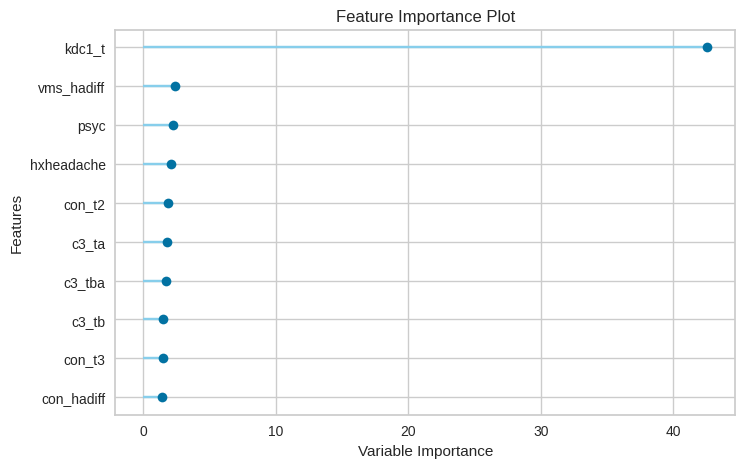

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6136,0.6906,0.9259,0.6250,0.7463,0.0508,0.0738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6897,0.7030,0.8780,0.7347,0.8000,0.1314,0.1425


In [ ]:
#catboost
f_catboost_exp = clf1.create_model('catboost', fold=5)
f_cat_grid = {'max_depth' : [8], 'num_trees': [4000]} #set maximum depth and max number of trees
f_tuned_cat_exp = clf1.tune_model(f_catboost_exp, custom_grid=f_cat_grid, fold=5)
clf1.plot_model(f_tuned_cat_exp, plot='feature')
clf1.predict_model(f_tuned_cat_exp)
final_f_catboost_exp = clf1.finalize_model(f_tuned_cat_exp)
f_predictions_catboost_exp = clf1.predict_model(final_f_catboost_exp, data=f_test)

##Males

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.0000,0.9565,0.6667,0.7857,0.2525,0.3227
1,0.6757,0.0000,0.9565,0.6667,0.7857,0.1986,0.2668
2,0.5135,0.0000,0.6522,0.6000,0.6250,-0.0639,-0.0643
3,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
4,0.5676,0.0000,0.9545,0.5833,0.7241,-0.0534,-0.1376
Mean,0.6125,0.0000,0.9040,0.6277,0.7374,0.0667,0.0775
Std,0.0649,0.0000,0.1270,0.0341,0.0606,0.1325,0.1835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6579,0.0000,0.9130,0.6562,0.7636,0.2006,0.2409
1,0.6216,0.0000,0.9565,0.6286,0.7586,0.0336,0.0599
2,0.4865,0.0000,0.6522,0.5769,0.6122,-0.1394,-0.1417
3,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
4,0.5676,0.0000,0.9545,0.5833,0.7241,-0.0534,-0.1376
Mean,0.5910,0.0000,0.8953,0.6133,0.7251,0.0083,0.0043
Std,0.0597,0.0000,0.1246,0.0296,0.0584,0.1125,0.1418


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


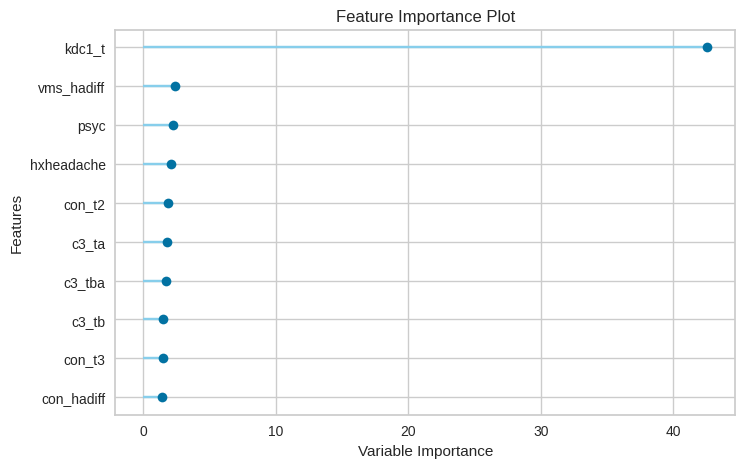

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6136,0.6906,0.9259,0.6250,0.7463,0.0508,0.0738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5833,0.6573,0.8462,0.5789,0.6875,0.1241,0.1459


In [ ]:
#Catboost
m_catboost_exp = clf1.create_model('catboost', fold=5)
cat_grid = {'max_depth' : [6], 'num_trees': [4000]} #set maximum depth and max number of trees
m_tuned_cat_exp = clf1.tune_model(m_catboost_exp, custom_grid=cat_grid, fold=5)
clf1.plot_model(m_tuned_cat_exp, plot='feature')
clf1.predict_model(m_tuned_cat_exp)
final_m_catboost_exp = clf1.finalize_model(m_tuned_cat_exp)
m_predictions_catboost_exp = clf1.predict_model(final_m_catboost_exp, data=m_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6579,0.0000,0.9565,0.6471,0.7719,0.1794,0.2493
1,0.5946,0.0000,0.8696,0.6250,0.7273,0.0142,0.0176
2,0.4054,0.0000,0.4348,0.5263,0.4762,-0.1971,-0.2019
3,0.6486,0.0000,0.9130,0.6562,0.7636,0.1456,0.1806
4,0.5135,0.0000,0.8636,0.5588,0.6786,-0.1562,-0.2453
Mean,0.5640,0.0000,0.8075,0.6027,0.6835,-0.0028,0.0001
Std,0.0945,0.0000,0.1894,0.0512,0.1088,0.1528,0.1980


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.0000,0.9130,0.6176,0.7368,0.0532,0.0739
1,0.6486,0.0000,0.9565,0.6471,0.7719,0.1174,0.1766
2,0.5135,0.0000,0.6522,0.6000,0.6250,-0.0639,-0.0643
3,0.6216,0.0000,0.8696,0.6452,0.7407,0.0944,0.1103
4,0.5135,0.0000,0.8636,0.5588,0.6786,-0.1562,-0.2453
Mean,0.5805,0.0000,0.8510,0.6137,0.7106,0.0090,0.0102
Std,0.0564,0.0000,0.1049,0.0326,0.0524,0.1036,0.1501


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


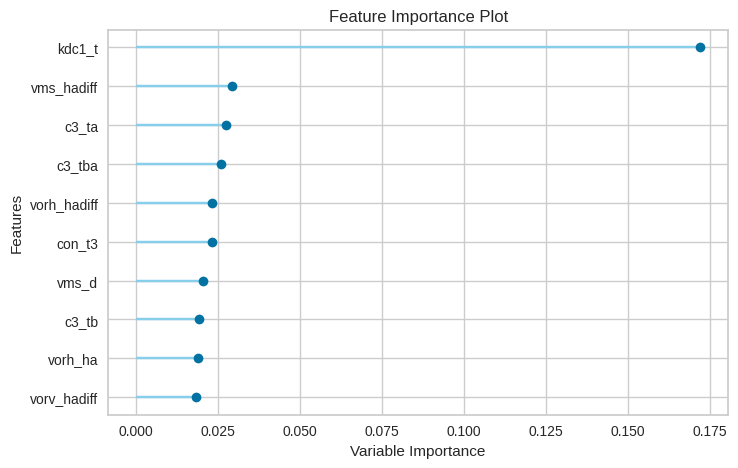

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6364,0.7473,0.8889,0.6486,0.7500,0.1394,0.1653


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5972,0.6900,0.7949,0.5962,0.6813,0.1635,0.1763


In [ ]:
#Random Forest
m_rf_exp=clf1.create_model('rf', fold=5)
rf_grid = {'max_depth' : [6]}
m_tuned_rf_exp = clf1.tune_model(m_rf_exp, custom_grid=rf_grid, fold=5)
clf1.plot_model(m_tuned_rf_exp, plot='feature')
clf1.predict_model(m_tuned_rf_exp)
final_m_rf_exp = clf1.finalize_model(m_tuned_rf_exp)
m_predictions_rf_exp = clf1.predict_model(final_m_rf_exp, data=m_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.7391,0.6800,0.7083,0.2107,0.2120
1,0.4865,0.0000,0.3043,0.7000,0.4242,0.0762,0.0984
2,0.5135,0.0000,0.4348,0.6667,0.5263,0.0698,0.0767
3,0.5135,0.0000,0.4783,0.6471,0.5500,0.0458,0.0484
4,0.3784,0.0000,0.3636,0.4706,0.4103,-0.2245,-0.2329
Mean,0.5047,0.0000,0.4640,0.6329,0.5238,0.0356,0.0405
Std,0.0807,0.0000,0.1499,0.0830,0.1073,0.1423,0.1476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.0000,1.0000,0.6053,0.7541,0.0000,0.0000
1,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
2,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
3,0.6216,0.0000,1.0000,0.6216,0.7667,0.0000,0.0000
4,0.5946,0.0000,1.0000,0.5946,0.7458,0.0000,0.0000
Mean,0.6129,0.0000,1.0000,0.6129,0.7600,0.0000,0.0000
Std,0.0111,0.0000,0.0000,0.0111,0.0086,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


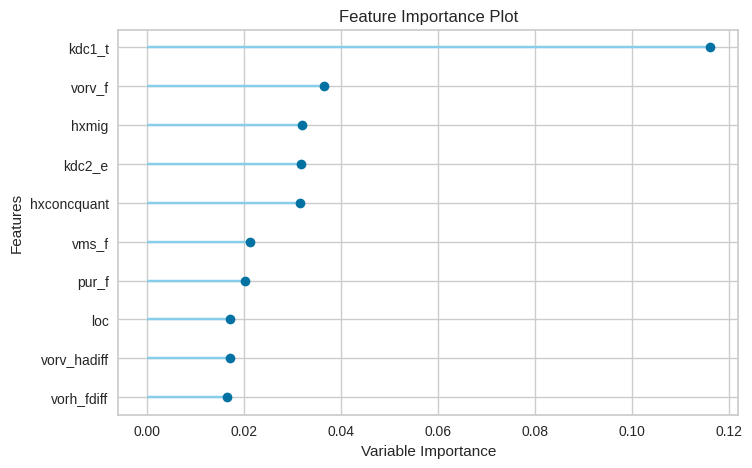

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6136,0.6122,1.0000,0.6136,0.7606,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5417,0.6535,1.0000,0.5417,0.7027,0.0000,0.0000


In [ ]:
#XGBoost
m_xg_exp=clf1.create_model('xgboost', fold=5)
#xg_grid = {'max_depth' : [6]}
m_tuned_xg_exp = clf1.tune_model(m_xg_exp, fold=5)
clf1.plot_model(m_tuned_xg_exp, plot='feature')
clf1.predict_model(m_tuned_xg_exp)
final_m_xg_exp = clf1.finalize_model(m_tuned_xg_exp)
m_predictions_xg_exp = clf1.predict_model(final_m_xg_exp, data=m_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.8696,0.6452,0.7407,0.1502,0.1718
1,0.5946,0.0000,0.8696,0.6250,0.7273,0.0142,0.0176
2,0.5135,0.0000,0.6522,0.6000,0.6250,-0.0639,-0.0643
3,0.6216,0.0000,0.8696,0.6452,0.7407,0.0944,0.1103
4,0.5676,0.0000,0.8182,0.6000,0.6923,0.0199,0.0228
Mean,0.5858,0.0000,0.8158,0.6231,0.7052,0.0429,0.0516
Std,0.0425,0.0000,0.0842,0.0202,0.0438,0.0734,0.0816


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.9130,0.6364,0.7500,0.1279,0.1635
1,0.6216,0.0000,0.9130,0.6364,0.7500,0.0650,0.0873
2,0.4865,0.0000,0.6957,0.5714,0.6275,-0.1736,-0.1825
3,0.5946,0.0000,0.8261,0.6333,0.7170,0.0448,0.0500
4,0.4865,0.0000,0.7727,0.5484,0.6415,-0.1776,-0.2139
Mean,0.5642,0.0000,0.8241,0.6052,0.6972,-0.0227,-0.0191
Std,0.0646,0.0000,0.0836,0.0377,0.0528,0.1278,0.1511


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


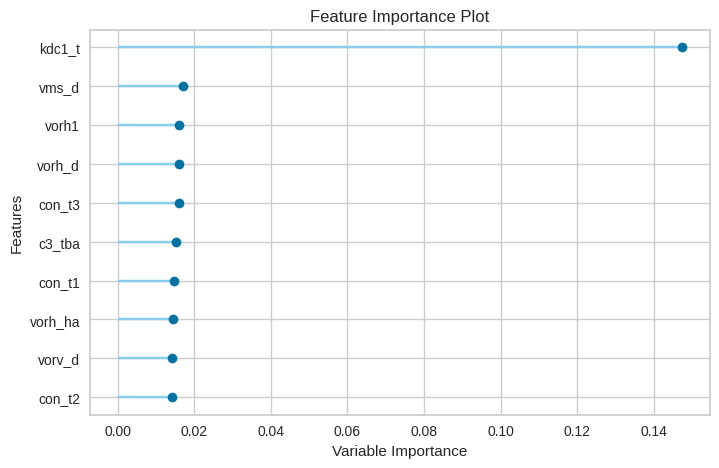

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7727,0.7669,0.8889,0.7742,0.8276,0.4989,0.5092


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6389,0.6235,0.7179,0.6512,0.6829,0.2659,0.2676


In [ ]:
#Extra Tree
m_et_exp=clf1.create_model('et',fold=5)
et_grid={'max_depth': [6]}
m_tuned_et_exp = clf1.tune_model(m_et_exp, custom_grid=et_grid, fold=5)
clf1.plot_model(m_tuned_et_exp, plot='feature')
clf1.predict_model(m_tuned_et_exp)
final_m_et_exp = clf1.finalize_model(m_tuned_et_exp)
m_predictions_rf_exp = clf1.predict_model(final_m_et_exp, data=m_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.0000,0.7826,0.6429,0.7059,0.1231,0.1287
1,0.5946,0.0000,0.6522,0.6818,0.6667,0.1501,0.1503
2,0.4324,0.0000,0.4783,0.5500,0.5116,-0.1580,-0.1602
3,0.6486,0.0000,0.7391,0.7083,0.7234,0.2425,0.2429
4,0.4324,0.0000,0.5455,0.5217,0.5333,-0.1899,-0.1902
Mean,0.5427,0.0000,0.6395,0.6209,0.6282,0.0336,0.0343
Std,0.0918,0.0000,0.1144,0.0731,0.0885,0.1743,0.1756


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.0000,0.7391,0.6800,0.7083,0.2107,0.2120
1,0.5676,0.0000,0.6087,0.6667,0.6364,0.1057,0.1064
2,0.4865,0.0000,0.5217,0.6000,0.5581,-0.0477,-0.0484
3,0.6216,0.0000,0.7391,0.6800,0.7083,0.1725,0.1737
4,0.4595,0.0000,0.5000,0.5500,0.5238,-0.0979,-0.0985
Mean,0.5533,0.0000,0.6217,0.6353,0.6270,0.0687,0.0691
Std,0.0697,0.0000,0.1025,0.0520,0.0758,0.1213,0.1222


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


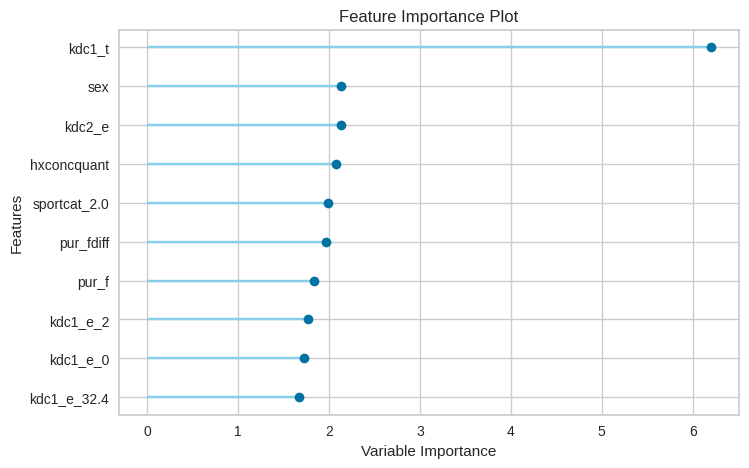

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6364,0.5991,0.5926,0.7619,0.6667,0.2802,0.2910


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5139,0.5307,0.8974,0.5303,0.6667,-0.0448,-0.0756


In [ ]:
#Logistic Reg Classifier
m_lr_exp=clf1.create_model('lr',fold=5)
m_tuned_lr_exp = clf1.tune_model(m_lr_exp, fold=5)
clf1.plot_model(m_tuned_lr_exp, plot='feature')
clf1.predict_model(m_tuned_lr_exp)
final_m_lr_exp = clf1.finalize_model(m_tuned_lr_exp)
m_predictions_lr_exp = clf1.predict_model(final_m_lr_exp, data=m_test)

#Models to Predict Days to Recovery

##Females

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1162,343.7978,18.5418,0.1052,0.5409,0.5653
1,15.9580,376.9746,19.4158,-0.0518,0.5873,0.5987
2,13.4198,285.2051,16.8880,-0.6302,0.6240,0.7870
3,19.0810,1648.2804,40.5990,-0.0694,0.6959,0.6889
4,17.0761,836.6311,28.9246,-0.0554,0.6175,0.4979
Mean,15.7302,698.1778,24.8738,-0.1403,0.6131,0.6276
Std,2.2477,514.0364,8.9146,0.2531,0.0508,0.1007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.7541,407.7626,20.1931,-0.0613,0.5871,0.6646
1,15.5426,374.3123,19.3472,-0.0443,0.5919,0.6222
2,13.3189,220.0992,14.8357,-0.2581,0.5941,0.7670
3,18.6038,1548.7565,39.3542,-0.0049,0.6621,0.6804
4,18.4717,825.3395,28.7287,-0.0412,0.6199,0.5668
Mean,16.1382,675.2540,24.4918,-0.0819,0.6110,0.6602
Std,2.0853,480.5862,8.6837,0.0900,0.0280,0.0663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


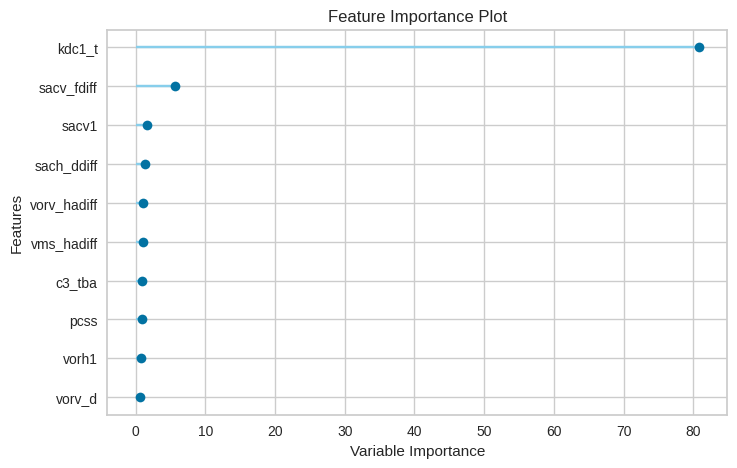

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,12.8469,382.6727,19.5620,-0.0259,0.4949,0.4656


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,13.4453,311.1084,17.6383,-0.0054,0.4994,0.4902


In [ ]:
#catboost regression
f_catboost = pycr.create_model('catboost',fold=5)
f_tuned_cat = pycr.tune_model(f_catboost, fold=5,optimize='RMSE')
pycr.plot_model(f_tuned_cat, plot='feature')
pycr.predict_model(f_tuned_cat)
final_f_cat = pycr.finalize_model(f_tuned_cat)
f_predictions_cat = pycr.predict_model(final_f_cat, data=f_test)

In [ ]:
pycr.predict_model(final_f_cat, f_train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,12.9276,495.2236,22.2536,0.1874,0.5028,0.5147


,partid,dataset,sex,age,grade,dsi,sport,sportcat,pcss,hxconc,...,con1,vorh1,vorv1,vms1,voms1,voms2,voms3,protracted,days,prediction_label
0,1544,3,1,13,NaN,NaN,volleyball,2.0,NaN,1,...,1,1,1,1,1,1,1,1,48.0,32.915979
1,1363,2,1,11,NaN,NaN,no,NaN,NaN,1,...,1,1,1,1,1,1,1,1,22.0,32.062208
2,1591,3,1,14,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,1,31.0,31.343255
3,1609,3,1,17,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,1,0,1,50.0,32.046498
4,1017,1,1,11,6.0,2.0,Gymnastics,2.0,NaN,0,...,1,1,1,1,1,1,1,1,72.0,42.670611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,1446,2,1,12,NaN,NaN,cheer,2.0,NaN,0,...,1,1,1,1,1,1,1,1,39.0,32.552511
226,1590,3,1,11,NaN,NaN,NaN,NaN,NaN,0,...,1,1,1,1,1,1,1,1,47.0,31.700437
227,1149,1,1,15,10.0,4.0,Cheer,2.0,NaN,1,...,1,1,1,1,1,1,0,0,19.0,25.960371
228,1554,3,1,13,NaN,NaN,basketball,2.0,NaN,0,...,1,1,1,1,1,1,1,0,15.0,30.578420


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.8874,306.0014,17.4929,0.2036,0.5418,0.5714
1,14.4540,341.7551,18.4866,0.0465,0.5584,0.5048
2,12.8419,279.2177,16.7098,-0.5960,0.6214,0.7652
3,21.4923,1741.8243,41.7352,-0.1301,0.7224,0.7744
4,17.1211,842.1807,29.0203,-0.0624,0.6261,0.5065
Mean,15.7593,702.1959,24.6890,-0.1077,0.6140,0.6245
Std,3.2614,559.6823,9.6255,0.2690,0.0637,0.1211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.5241,393.2438,19.8304,-0.0235,0.5825,0.6678
1,15.3865,374.3168,19.3473,-0.0443,0.5964,0.6286
2,13.9701,237.3486,15.4061,-0.3567,0.6147,0.8122
3,18.9511,1548.4502,39.3504,-0.0047,0.6715,0.7114
4,18.6958,816.7308,28.5785,-0.0303,0.6256,0.5983
Mean,16.3055,674.0180,24.5025,-0.0919,0.6181,0.6837
Std,2.1064,478.4002,8.5816,0.1330,0.0305,0.0747


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


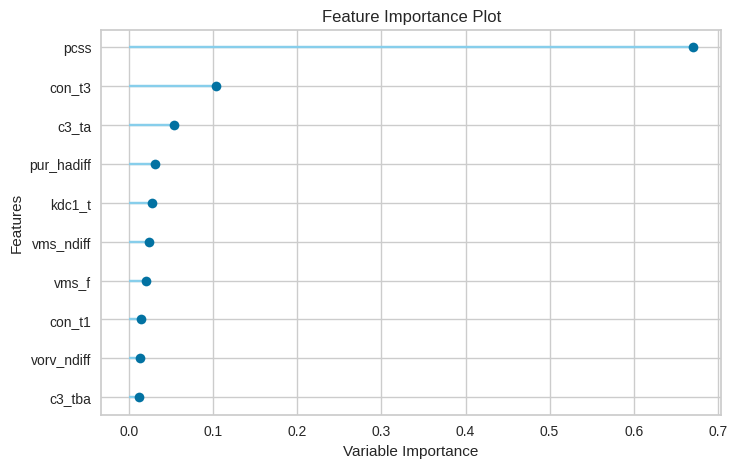

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,12.9178,378.9379,19.4663,-0.0159,0.4986,0.4839


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,13.7371,309.1956,17.5840,0.0007,0.5055,0.5141


In [ ]:
#xgboost regression
f_xg = pycr.create_model('xgboost',fold=5)
f_tuned_xg = pycr.tune_model(f_xg, fold=5,optimize='RMSE')
pycr.plot_model(f_tuned_xg, plot='feature')
pycr.predict_model(f_tuned_xg)
final_f_xg = pycr.finalize_model(f_tuned_xg)
f_predictions_xg = pycr.predict_model(final_f_xg, data=f_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.9939,304.7122,17.4560,0.2069,0.5277,0.5670
1,16.4673,403.4410,20.0858,-0.1256,0.6024,0.6213
2,14.2443,470.0169,21.6799,-1.6866,0.6708,0.8964
3,19.9778,1665.4317,40.8097,-0.0806,0.7106,0.7567
4,17.8719,838.9075,28.9639,-0.0583,0.6267,0.5460
Mean,16.3111,736.5018,25.7991,-0.3488,0.6277,0.6775
Std,2.4972,498.3540,8.4208,0.6789,0.0622,0.1318


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0522,403.3677,20.0840,-0.0498,0.5890,0.6815
1,15.0792,349.1921,18.6867,0.0258,0.5717,0.6011
2,13.2499,221.8475,14.8945,-0.2681,0.5949,0.7704
3,18.3926,1549.0823,39.3584,-0.0051,0.6459,0.6497
4,18.2447,808.2877,28.4304,-0.0197,0.6100,0.5607
Mean,16.0037,666.3555,24.2908,-0.0634,0.6023,0.6527
Std,2.0036,483.0515,8.7357,0.1052,0.0250,0.0718


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


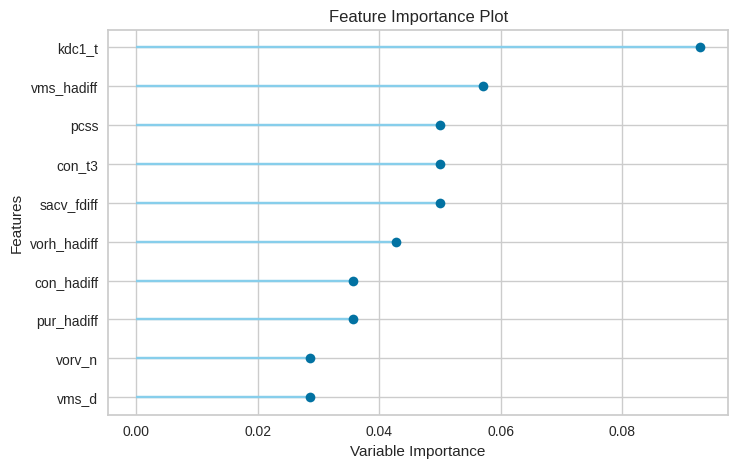

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.6258,354.3800,18.8250,0.0500,0.4780,0.4663


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,13.1619,292.6333,17.1065,0.0543,0.4868,0.4855


In [ ]:
#Random Forest
f_rf_reg=pycr.create_model('rf', fold=5)
#f_rf_grid_reg={'max_depth': [8]}
f_tuned_rf_reg=pycr.tune_model(f_rf_reg, fold=5,optimize='RMSE')
pycr.plot_model(f_tuned_rf_reg, plot='feature')
pycr.predict_model(f_tuned_rf_reg)
final_f_rf_reg = pycr.finalize_model(f_tuned_rf_reg)
f__rf_predictions_reg = pycr.predict_model(final_f_rf_reg, data=f_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.0055,1319.0569,36.3188,-2.4331,0.7311,0.8885
1,16.2466,402.4184,20.0604,-0.1227,0.6192,0.6462
2,11.5657,177.7291,13.3315,-0.0159,0.5241,0.6360
3,19.0406,1650.6597,40.6283,-0.0710,0.7030,0.6827
4,18.9635,872.5267,29.5386,-0.1007,0.6578,0.6078
Mean,17.3644,884.4782,27.9755,-0.5487,0.6470,0.6922
Std,3.2711,549.1651,10.0920,0.9429,0.0724,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.2355,433.7582,20.8269,-0.1289,0.6116,0.6984
1,15.4396,370.1882,19.2403,-0.0328,0.5850,0.6067
2,13.6950,246.1019,15.6876,-0.4067,0.6144,0.8045
3,18.9672,1603.2631,40.0408,-0.0402,0.6800,0.6943
4,18.2634,808.1599,28.4282,-0.0195,0.6158,0.5756
Mean,16.3201,692.2943,24.8447,-0.1256,0.6214,0.6759
Std,1.9812,492.5383,8.6622,0.1457,0.0314,0.0803


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


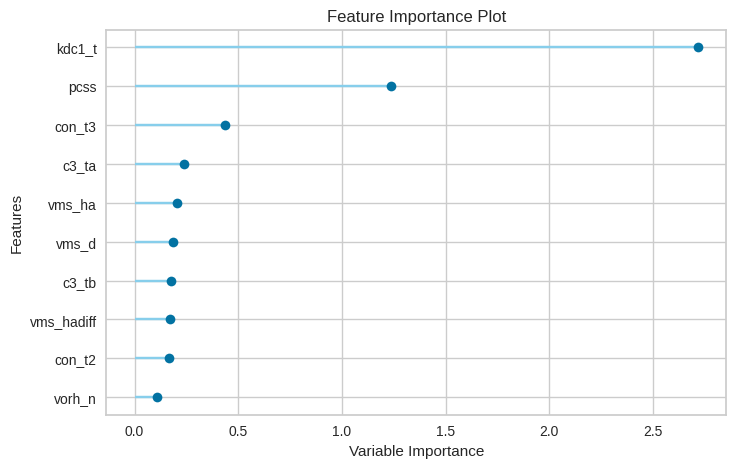

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,14.0255,398.2842,19.9571,-0.0678,0.5221,0.5151


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,12.9407,287.8158,16.9651,0.0698,0.4879,0.4771


In [ ]:
#Elastic Net
f_en_reg=pycr.create_model('en', fold=5)
#f_en_grid_reg={'max_depth': [8]}
f_tuned_en_reg=pycr.tune_model(f_en_reg, fold=5,optimize='RMSE')
pycr.plot_model(f_tuned_en_reg, plot='feature')
pycr.predict_model(f_tuned_en_reg)
final_f_en_reg = pycr.finalize_model(f_tuned_en_reg)
f_en_predictions_reg = pycr.predict_model(final_f_en_reg, data=f_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.6134,411.1563,20.2770,-0.0701,0.5895,0.6695
1,15.9003,361.6923,19.0182,-0.0091,0.6004,0.6784
2,15.6846,535.6257,23.1436,-2.0617,0.6885,0.9971
3,19.9143,1664.0261,40.7925,-0.0796,0.6937,0.7165
4,18.4795,847.8833,29.1184,-0.0696,0.6307,0.5695
Mean,16.9184,764.0768,26.4699,-0.4580,0.6405,0.7262
Std,1.9639,480.7470,7.9636,0.8022,0.0434,0.1439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.9733,389.6275,19.7390,-0.0141,0.5665,0.6268
1,16.0383,374.7107,19.3574,-0.0454,0.6008,0.6598
2,14.7092,517.7189,22.7534,-1.9593,0.6665,0.9415
3,19.5099,1646.4951,40.5770,-0.0683,0.6786,0.6917
4,18.1512,837.4744,28.9391,-0.0565,0.6192,0.5432
Mean,16.4764,753.2053,26.2732,-0.4287,0.6263,0.6926
Std,2.0779,476.6485,7.9325,0.7655,0.0415,0.1339


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


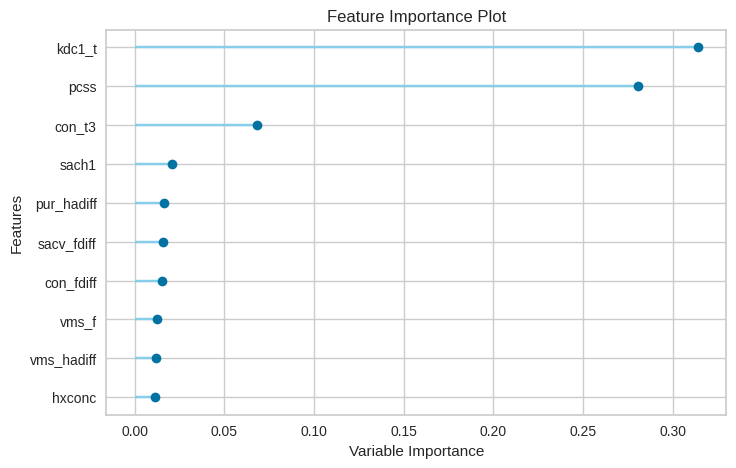

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,13.6808,427.9924,20.6880,-0.1474,0.5188,0.4876


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,14.8723,488.0363,22.0915,-0.5772,0.5176,0.5052


In [ ]:
#Extra Tree
f_et_reg=pycr.create_model('et',fold=5)
f_et_reg_grid={'max_depth': [8]}
f_tuned_et_reg = pycr.tune_model(f_et_reg, custom_grid=f_et_reg_grid, fold=5,optimize='RMSE')
pycr.plot_model(f_tuned_et_reg, plot='feature')
pycr.predict_model(f_tuned_et_reg)
final_f_et_reg = pycr.finalize_model(f_tuned_et_reg)
f_predictions_rf_reg = pycr.predict_model(final_f_et_reg, data=f_test)

##Males

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1162,343.7978,18.5418,0.1052,0.5409,0.5653
1,15.9580,376.9746,19.4158,-0.0518,0.5873,0.5987
2,13.4198,285.2051,16.8880,-0.6302,0.6240,0.7870
3,19.0810,1648.2804,40.5990,-0.0694,0.6959,0.6889
4,17.0761,836.6311,28.9246,-0.0554,0.6175,0.4979
Mean,15.7302,698.1778,24.8738,-0.1403,0.6131,0.6276
Std,2.2477,514.0364,8.9146,0.2531,0.0508,0.1007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.7541,407.7626,20.1931,-0.0613,0.5871,0.6646
1,15.5426,374.3123,19.3472,-0.0443,0.5919,0.6222
2,13.3189,220.0992,14.8357,-0.2581,0.5941,0.7670
3,18.6038,1548.7565,39.3542,-0.0049,0.6621,0.6804
4,18.4717,825.3395,28.7287,-0.0412,0.6199,0.5668
Mean,16.1382,675.2540,24.4918,-0.0819,0.6110,0.6602
Std,2.0853,480.5862,8.6837,0.0900,0.0280,0.0663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


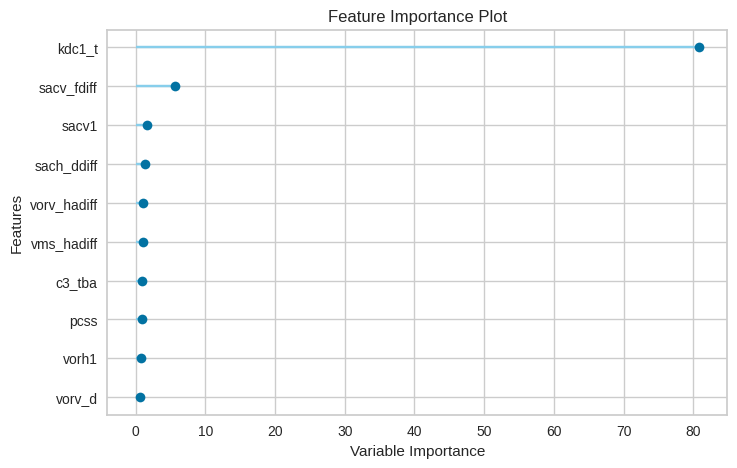

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,12.8469,382.6727,19.5620,-0.0259,0.4949,0.4656


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,12.2671,206.4397,14.3680,-0.0808,0.6834,1.2330


In [ ]:
#catboost regression
m_catboost = pycr.create_model('catboost',fold=5)
m_tuned_cat = pycr.tune_model(m_catboost, fold=5,optimize='RMSE')
pycr.plot_model(m_tuned_cat, plot='feature')
pycr.predict_model(m_tuned_cat)
final_m_cat = pycr.finalize_model(m_tuned_cat)
m_predictions_cat = pycr.predict_model(final_m_cat, data=m_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.8874,306.0014,17.4929,0.2036,0.5418,0.5714
1,14.4540,341.7551,18.4866,0.0465,0.5584,0.5048
2,12.8419,279.2177,16.7098,-0.5960,0.6214,0.7652
3,21.4923,1741.8243,41.7352,-0.1301,0.7224,0.7744
4,17.1211,842.1807,29.0203,-0.0624,0.6261,0.5065
Mean,15.7593,702.1959,24.6890,-0.1077,0.6140,0.6245
Std,3.2614,559.6823,9.6255,0.2690,0.0637,0.1211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.5241,393.2438,19.8304,-0.0235,0.5825,0.6678
1,15.3865,374.3168,19.3473,-0.0443,0.5964,0.6286
2,13.9701,237.3486,15.4061,-0.3567,0.6147,0.8122
3,18.9511,1548.4502,39.3504,-0.0047,0.6715,0.7114
4,18.6958,816.7308,28.5785,-0.0303,0.6256,0.5983
Mean,16.3055,674.0180,24.5025,-0.0919,0.6181,0.6837
Std,2.1064,478.4002,8.5816,0.1330,0.0305,0.0747


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


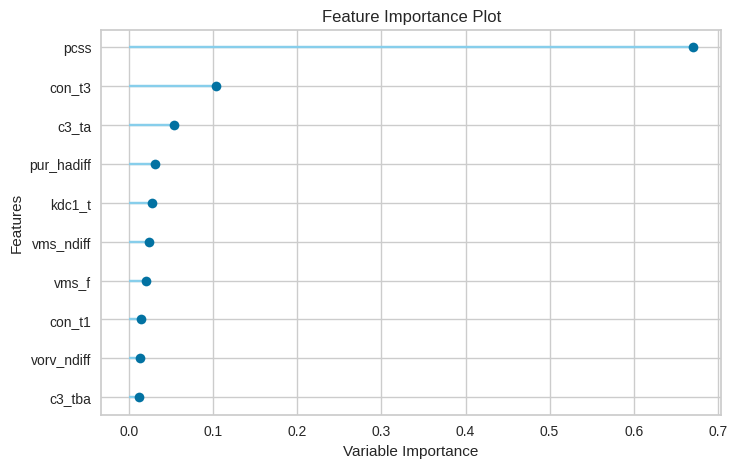

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,12.9178,378.9379,19.4663,-0.0159,0.4986,0.4839


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,12.4264,213.9824,14.6281,-0.1203,0.6980,1.2814


In [ ]:
#xgboost regression
m_xg = pycr.create_model('xgboost',fold=5)
m_tuned_xg = pycr.tune_model(m_xg, fold=5,optimize='RMSE')
pycr.plot_model(m_tuned_xg, plot='feature')
pycr.predict_model(m_tuned_xg)
final_m_xg = pycr.finalize_model(m_tuned_xg)
m_predictions_xg = pycr.predict_model(final_m_xg, data=m_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.9939,304.7122,17.4560,0.2069,0.5277,0.5670
1,16.4673,403.4410,20.0858,-0.1256,0.6024,0.6213
2,14.2443,470.0169,21.6799,-1.6866,0.6708,0.8964
3,19.9778,1665.4317,40.8097,-0.0806,0.7106,0.7567
4,17.8719,838.9075,28.9639,-0.0583,0.6267,0.5460
Mean,16.3111,736.5018,25.7991,-0.3488,0.6277,0.6775
Std,2.4972,498.3540,8.4208,0.6789,0.0622,0.1318


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0522,403.3677,20.0840,-0.0498,0.5890,0.6815
1,15.0792,349.1921,18.6867,0.0258,0.5717,0.6011
2,13.2499,221.8475,14.8945,-0.2681,0.5949,0.7704
3,18.3926,1549.0823,39.3584,-0.0051,0.6459,0.6497
4,18.2447,808.2877,28.4304,-0.0197,0.6100,0.5607
Mean,16.0037,666.3555,24.2908,-0.0634,0.6023,0.6527
Std,2.0036,483.0515,8.7357,0.1052,0.0250,0.0718


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


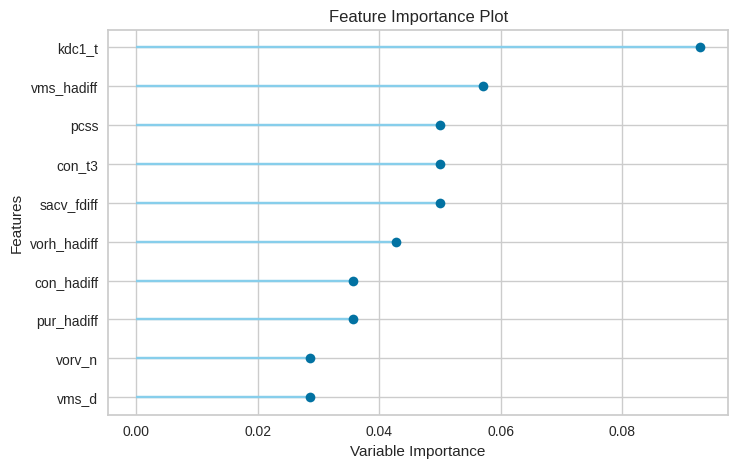

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.6258,354.3800,18.8250,0.0500,0.4780,0.4663


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.0214,196.6813,14.0243,-0.0297,0.6772,1.2522


In [ ]:
#Random Forest
m_rf=pycr.create_model('rf', fold=5)
m_tuned_rf=pycr.tune_model(m_rf, fold=5,optimize='RMSE')
pycr.plot_model(m_tuned_rf, plot='feature')
pycr.predict_model(m_tuned_rf)
final_m_rf = pycr.finalize_model(m_tuned_rf)
m_predictions_rf = pycr.predict_model(final_m_rf, data=m_test)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.0055,1319.0569,36.3188,-2.4331,0.7311,0.8885
1,16.2466,402.4184,20.0604,-0.1227,0.6192,0.6462
2,11.5657,177.7291,13.3315,-0.0159,0.5241,0.6360
3,19.0406,1650.6597,40.6283,-0.0710,0.7030,0.6827
4,18.9635,872.5267,29.5386,-0.1007,0.6578,0.6078
Mean,17.3644,884.4782,27.9755,-0.5487,0.6470,0.6922
Std,3.2711,549.1651,10.0920,0.9429,0.0724,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.2355,433.7582,20.8269,-0.1289,0.6116,0.6984
1,15.4396,370.1882,19.2403,-0.0328,0.5850,0.6067
2,13.6950,246.1019,15.6876,-0.4067,0.6144,0.8045
3,18.9672,1603.2631,40.0408,-0.0402,0.6800,0.6943
4,18.2634,808.1599,28.4282,-0.0195,0.6158,0.5756
Mean,16.3201,692.2943,24.8447,-0.1256,0.6214,0.6759
Std,1.9812,492.5383,8.6622,0.1457,0.0314,0.0803


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


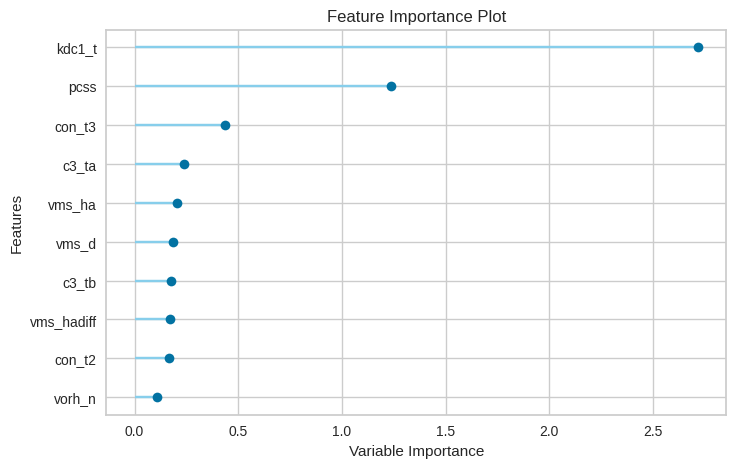

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,14.0255,398.2842,19.9571,-0.0678,0.5221,0.5151


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,16.5330,453.7341,21.3010,-1.3755,0.9364,1.1203


In [ ]:
#Elastic Net
m_en_reg=pycr.create_model('en', fold=5)
#m_en_grid_reg={'max_depth': [6]}
m_tuned_en_reg=pycr.tune_model(m_en_reg, fold=5,optimize='RMSE')
pycr.plot_model(m_tuned_en_reg, plot='feature')
pycr.predict_model(m_tuned_en_reg)
final_m_en_reg = pycr.finalize_model(m_tuned_en_reg)
m_en_predictions_reg = pycr.predict_model(final_m_en_reg, data=m_test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.6134,411.1563,20.2770,-0.0701,0.5895,0.6695
1,15.9003,361.6923,19.0182,-0.0091,0.6004,0.6784
2,15.6846,535.6257,23.1436,-2.0617,0.6885,0.9971
3,19.9143,1664.0261,40.7925,-0.0796,0.6937,0.7165
4,18.4795,847.8833,29.1184,-0.0696,0.6307,0.5695
Mean,16.9184,764.0768,26.4699,-0.4580,0.6405,0.7262
Std,1.9639,480.7470,7.9636,0.8022,0.0434,0.1439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.3248,403.9399,20.0983,-0.0513,0.5826,0.6551
1,15.4378,349.3190,18.6901,0.0254,0.5833,0.6319
2,14.8962,437.3325,20.9125,-1.4998,0.6609,0.9286
3,19.0179,1636.2881,40.4511,-0.0616,0.6640,0.6422
4,18.4060,863.2401,29.3809,-0.0890,0.6283,0.5364
Mean,16.4165,738.0239,25.9066,-0.3353,0.6238,0.6788
Std,1.9168,484.9075,8.1776,0.5835,0.0357,0.1317


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


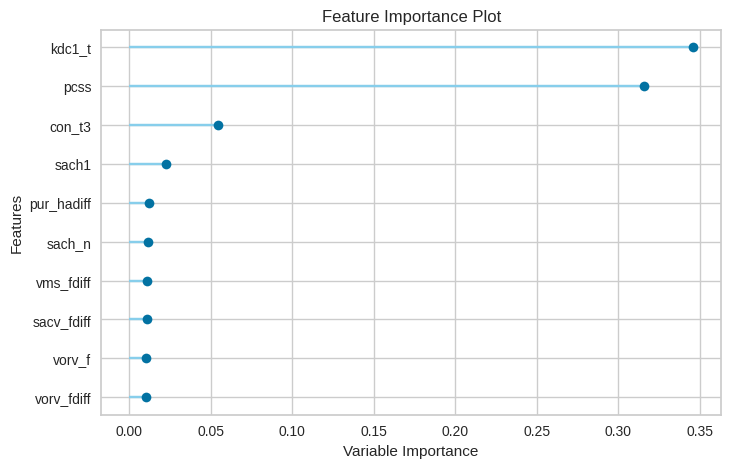

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,13.1337,390.8232,19.7692,-0.0477,0.4958,0.4694


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,30.6980,2781.0337,52.7355,-13.5599,0.9518,1.9531


In [ ]:
#Extra Tree
m_et_reg=pycr.create_model('et',fold=5)
m_et_reg_grid={'max_depth': [6]} #makes model worse??
m_tuned_et_reg = pycr.tune_model(m_et_reg, custom_grid=m_et_reg_grid, fold=5, optimize='RMSE')
pycr.plot_model(m_tuned_et_reg, plot='feature')
pycr.predict_model(m_tuned_et_reg)
final_m_et_reg = pycr.finalize_model(m_tuned_et_reg)
m_predictions_rf_reg = pycr.predict_model(final_m_et_reg, data=m_test)

In [ ]:
print(final_m_cat)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sex', 'age', 'grade', 'dsi',
                                             'pcss', 'hxconcquant', 'hxmig',
                                             'psyc', 'hxdizz', 'hxheadache',
                                             'hxvision', 'hxamnesia', 'loc',
                                             'bl_ha', 'bl_d', 'bl_n', 'bl_f',
                                             'pur_ha', 'pur_d', 'pur_n',
                                             'pur_f', 'sach_ha', 'sach_d',
                                             'sach_n', 'sach_f', 'sacv_ha',
                                             'sacv_d', 'sacv_n', 'sa...
                ('rest_encoding',
                 TransformerWrapper(exclude=None, include=['kdc1_t'],
                                    transformer=TargetEncoder(cols=['kdc1_t'],
          